In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values



loo = LeaveOneOut()
loo_scores = [] 

## Splitting & Using SVM


In [4]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [6]:
# from sklearn.svm import SVC

# svm_classifier = SVC(kernel='linear')  
# svm_classifier.fit(X, y)

# cv = LeaveOneOut()
# y_pred = cross_val_predict(svm_classifier, X, y, cv=cv)




## Using Evaluation Metrics

Leave-One-Out CV Accuracy: 89.08748824082785 %
Precision (macro) = 0.812836369979227
Recall (macro) = 0.7684119537843487
F1-score (macro) = 0.788459278406424
*******************


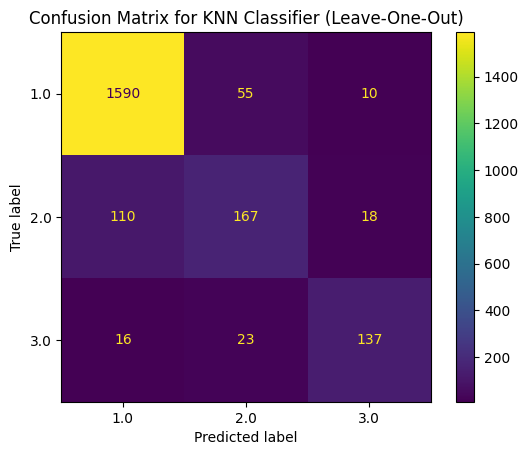

Classification Report:
              precision    recall  f1-score   support

         1.0       0.93      0.96      0.94      1655
         2.0       0.68      0.57      0.62       295
         3.0       0.83      0.78      0.80       176

    accuracy                           0.89      2126
   macro avg       0.81      0.77      0.79      2126
weighted avg       0.88      0.89      0.89      2126



In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

svm_classifier = SVC(kernel='linear')  

svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
loo_scores.append(y_pred[0] == y_test[0])


# Print accuracy
accuracy = accuracy_score(y, svm_classifier.predict(X))

precision = precision_score(y, svm_classifier.predict(X), average='macro')
recall = recall_score(y, svm_classifier.predict(X), average='macro')
f1 = f1_score(y, svm_classifier.predict(X), average='macro')
print("Leave-One-Out CV Accuracy:", accuracy * 100, "%")

print("Precision (macro) =", precision)
print("Recall (macro) =", recall)
print("F1-score (macro) =", f1)

print("*******************")

conf_matrix = confusion_matrix(y, svm_classifier.predict(X))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for KNN Classifier (Leave-One-Out)')
plt.show()
class_report = classification_report(y, svm_classifier.predict(X))
print("Classification Report:")
print(class_report)




In [8]:
# train_sizes, train_scores, test_scores = learning_curve(svm_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# plt.figure()
# plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
# plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
# plt.xlabel("Training examples")
# plt.ylabel("Score")
# plt.title("Learning Curve")
# plt.legend(loc="best")
# plt.show()

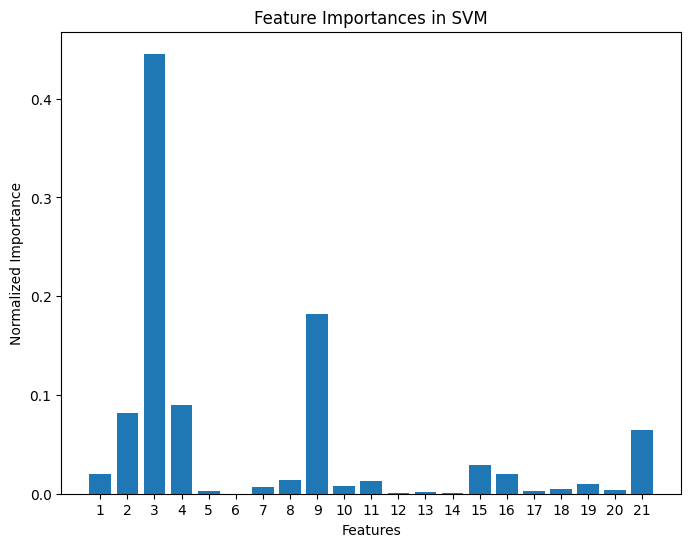

In [9]:
feature_importances = np.abs(svm_classifier.coef_)[0]

feature_importances /= np.sum(feature_importances)
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(feature_importances) + 1), feature_importances)
plt.title("Feature Importances in SVM")
plt.xlabel("Features")
plt.ylabel("Normalized Importance")
plt.xticks(range(1, len(feature_importances) + 1))  # Set x-axis ticks to be feature numbers
plt.show()


## Checking class distribution

Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64
Coefficient of Variation (CV): 1.1595095195631708


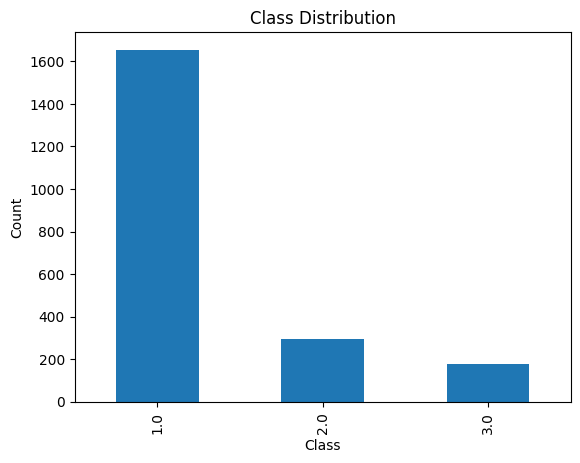

In [10]:

target_column = 'fetal_health'

class_distribution = df[target_column].value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Applying SMOTE


In [11]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_normalized, y_train)

# y_resampled_int = y_resampled.astype(int)



Class Distribution:
2.0    1654
1.0    1654
3.0    1654
Name: count, dtype: int64
Coefficient of Variation (CV): 0.0


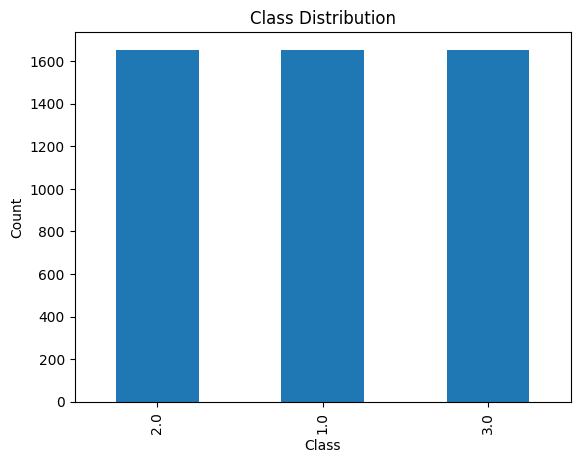

In [12]:

y_resampled_series = pd.Series(y_resampled)

class_distribution = y_resampled_series.value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Using SVM

Accuracy: 86.96090286174929 %
Precision (macro) = 0.8815567138868258
Recall (macro) = 0.8744457879887143
F1-score (macro) = 0.8758226185025483


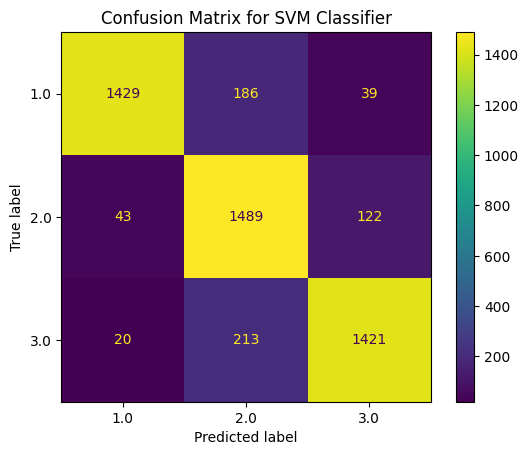

Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.86      0.91      1654
         2.0       0.79      0.90      0.84      1654
         3.0       0.90      0.86      0.88      1654

    accuracy                           0.87      4962
   macro avg       0.88      0.87      0.88      4962
weighted avg       0.88      0.87      0.88      4962



In [13]:

from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

svm_after_smote = SVC(kernel='linear', random_state=42)

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_pred_res = cross_val_predict(svm_after_smote, X_resampled, y_resampled, cv=stratified_kfold)

accuracy = accuracy_score(y_resampled, y_pred_res)
print("Accuracy:", accuracy * 100, "%")

svm_after_smote.fit(X_resampled, y_resampled)

y_pred_full = svm_after_smote.predict(X_resampled)

precision = precision_score(y_resampled, y_pred_full, average='macro')
recall = recall_score(y_resampled, y_pred_full, average='macro')
f1 = f1_score(y_resampled, y_pred_full, average='macro')
print("Precision (macro) =", precision)
print("Recall (macro) =", recall)
print("F1-score (macro) =", f1)

conf_matrix = confusion_matrix(y_resampled, y_pred_full)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_resampled))
disp.plot()
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

class_report = classification_report(y_resampled, y_pred_full)
print("Classification Report:")
print(class_report)




## Using Evaluation Metrics

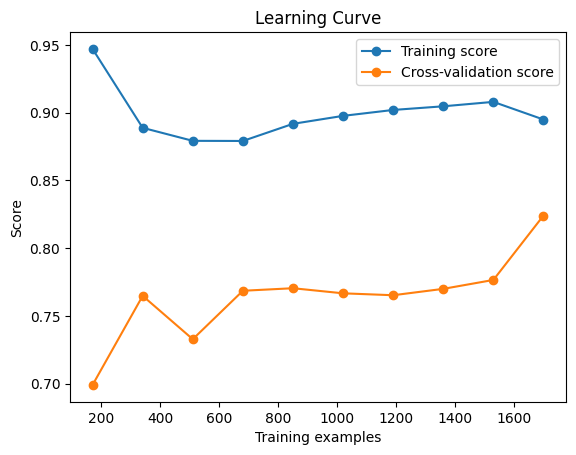

In [15]:
train_sizes, train_scores, test_scores = learning_curve(svm_after_smote, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

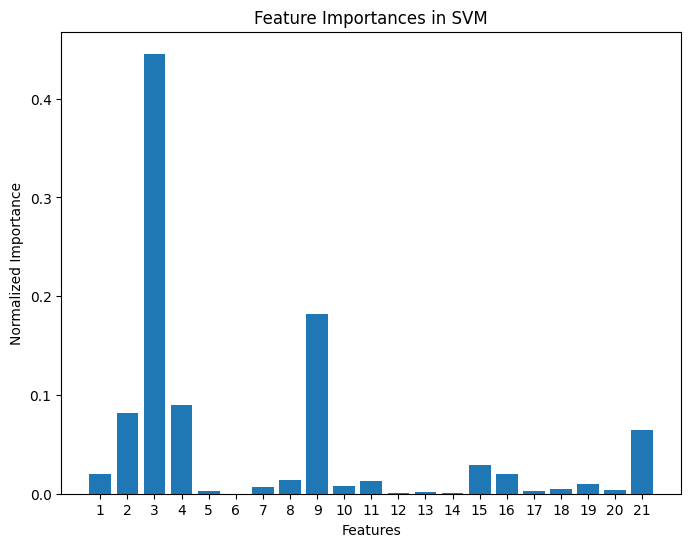

In [16]:
feature_importances = np.abs(svm_classifier.coef_)[0]

feature_importances /= np.sum(feature_importances)
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(feature_importances) + 1), feature_importances)
plt.title("Feature Importances in SVM")
plt.xlabel("Features")
plt.ylabel("Normalized Importance")
plt.xticks(range(1, len(feature_importances) + 1))  # Set x-axis ticks to be feature numbers
plt.show()
